In [6]:
from svmutil import *
import numpy
import matplotlib.pyplot as plt

In [7]:
trainFileScaled = '/home/manikaran/M.tech/MachineLearning/Assignment2/mnist/trainLibSVMScaled.txt'
testFileScaled = '/home/manikaran/M.tech/MachineLearning/Assignment2/mnist/testLibSVMScaled.txt'

In [8]:
yTrain, xTrain = svm_read_problem(trainFileScaled)

In [9]:
problem = svm_problem(yTrain, xTrain)
paramString = '-t 2 -g 0.05 -c 5'
params = svm_parameter(paramString)
model = svm_train(problem, params)

In [39]:
yTest, xTest = svm_read_problem(testFileScaled)
(label, acc, vals) = svm_predict(yTest, xTest, model)

Accuracy = 97.29% (9729/10000) (classification)


In [70]:
print(svm_save_model('trainedModelq2e', model))

None


In [69]:
from functools import reduce
print(reduce(lambda x,y: x+y , [reduce(lambda x,y: x+y, wrongPredictionMatrix[i]) for i in range(10)]))

271


In [11]:
print("Type of label : ", type(label))
print("Type of yTest : ", type(yTest))

Type of label :  <class 'list'>
Type of yTest :  <class 'list'>


In [22]:
with open('/home/manikaran/M.tech/MachineLearning/Assignment2/mnist/test.csv','r') as testImageVectors:
    imageVectors = numpy.loadtxt(testImageVectors, delimiter=',' , dtype=int)
    wrongPredictions = []
    featureXOfWrongPredictions = []
    count = 0
    labelIndex = imageVectors.shape[1]-1
    for i in range(len(label)):
        if yTest[i] != label[i]:
            count += 1
            wrongPredictions.append((yTest[i], label[i]))
            featureXOfWrongPredictions.append(imageVectors[i, :labelIndex])
    print("Number of wrong predictions = ", count)

Number of wrong predictions =  271


In [23]:
wrongPredictionMatrix = [[0]*10 for i in range(10)]
for (r,c) in wrongPredictions:
    wrongPredictionMatrix[int(r)][int(c)] += 1
for i in range(10):
    print(i, ',',  wrongPredictionMatrix[i])

0 , [0, 0, 1, 0, 0, 3, 4, 1, 2, 0]
1 , [0, 0, 3, 2, 1, 2, 2, 0, 2, 1]
2 , [4, 0, 0, 4, 2, 0, 1, 6, 15, 0]
3 , [0, 0, 8, 0, 0, 4, 0, 7, 5, 1]
4 , [1, 0, 4, 0, 0, 0, 5, 0, 2, 8]
5 , [2, 0, 3, 6, 1, 0, 7, 1, 5, 1]
6 , [5, 4, 0, 0, 3, 4, 0, 0, 2, 0]
7 , [1, 4, 20, 2, 3, 0, 0, 0, 2, 10]
8 , [4, 0, 3, 10, 1, 5, 3, 3, 0, 3]
9 , [4, 4, 3, 8, 9, 4, 0, 9, 11, 0]


In [53]:
# digit 7 is wrongly predicted as 2 - 20 times
# digit 2 is wrongly predicted as 9 - 15 times
# x is a feature in libSVM format
def createFeatureVector(x, length):
    feature = numpy.zeros((1,length), dtype=int)
    for ind in x:
        feature[0,ind] = int(x[ind])
    feature.resize(28,28)
    print(feature)
    return feature 

In [45]:
plotMe = []
for i,(actual, test) in enumerate(wrongPredictions):
    if test == 8 and actual == 2:
        plotMe.append((test,actual,featureXOfWrongPredictions[i]))
    elif test == 2 and actual == 7:
        plotMe.append((test,actual,featureXOfWrongPredictions[i]))


In [46]:
print(len(plotMe))

35


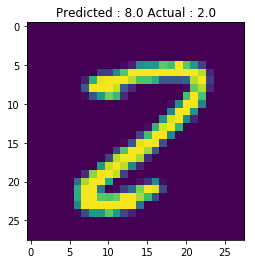

In [28]:
plt.title('Predicted : ' + str(plotMe[0][0]) + " Actual : " + str(plotMe[0][1]))
plt.imshow(plotMe[0][2].reshape(28,28))

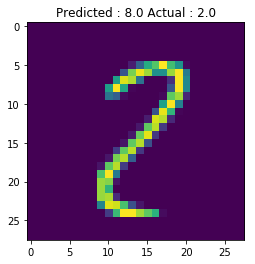

In [47]:
plt.title('Predicted : ' + str(plotMe[1][0]) + " Actual : " + str(plotMe[1][1]))
plt.imshow(plotMe[1][2].reshape(28,28))

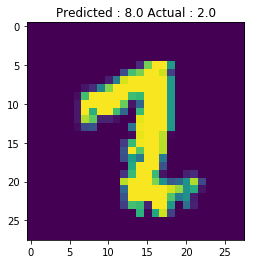

In [48]:
plt.title('Predicted : ' + str(plotMe[2][0]) + " Actual : " + str(plotMe[2][1]))
plt.imshow(plotMe[2][2].reshape(28,28))

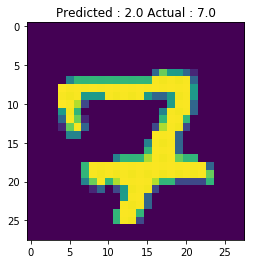

In [49]:
plt.title('Predicted : ' + str(plotMe[3][0]) + " Actual : " + str(plotMe[3][1]))
plt.imshow(plotMe[3][2].reshape(28,28))

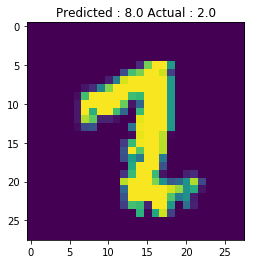

In [32]:
plt.title('Predicted : ' + str(plotMe[4][0]) + " Actual : " + str(plotMe[4][1]))
plt.imshow(plotMe[4][2].reshape(28,28))

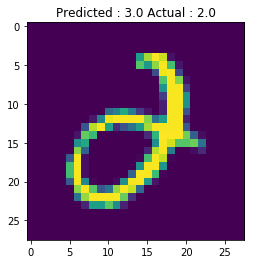

In [36]:
plt.title('Predicted : ' + str(wrongPredictions[145][1])  + " Actual : " + str(wrongPredictions[145][0]))
plt.imshow(featureXOfWrongPredictions[145].reshape(28,28))

In [23]:
# verification
from functools import reduce
print(reduce(lambda x,y: x+y , [reduce(lambda x,y: x+y, wrongPredictionMatrix[i]) for i in range(10)]))

271


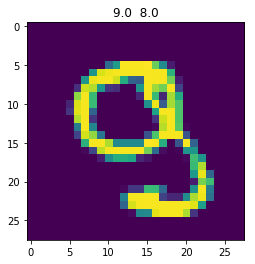

In [67]:
plt.title(str(wrongPredictions[2][0]) + "  " + str(wrongPredictions[2][1]))
plt.imshow(featureXOfWrongPredictions[2].reshape(28,28))

In [29]:
print(wrongPredictionMatrix)

[[0, 0, 1, 0, 0, 3, 4, 1, 2, 0], [0, 0, 3, 2, 1, 2, 2, 0, 2, 1], [4, 0, 0, 4, 2, 0, 1, 6, 15, 0], [0, 0, 8, 0, 0, 4, 0, 7, 5, 1], [1, 0, 4, 0, 0, 0, 5, 0, 2, 8], [2, 0, 3, 6, 1, 0, 7, 1, 5, 1], [5, 4, 0, 0, 3, 4, 0, 0, 2, 0], [1, 4, 20, 2, 3, 0, 0, 0, 2, 10], [4, 0, 3, 10, 1, 5, 3, 3, 0, 3], [4, 4, 3, 8, 9, 4, 0, 9, 11, 0]]


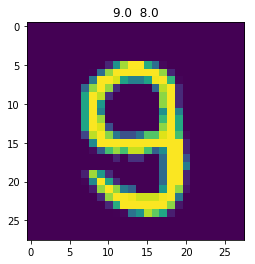

In [68]:
plt.title(str(wrongPredictions[3][0]) + "  " + str(wrongPredictions[3][1]))
plt.imshow(featureXOfWrongPredictions[3].reshape(28,28))

In [23]:
# verification
from functools import reduce
print(reduce(lambda x,y: x+y , [reduce(lambda x,y: x+y, wrongPredictionMatrix[i]) for i in range(10)]))

271


In [14]:
def generateConfusionMatrix(predictedLabels, originalLabels):
    confusionMatrix = [[0]*10 for i in range(10)]
    for predicted, original in zip(predictedLabels, originalLabels):
        confusionMatrix[int(predicted)][int(original)] += 1
    return confusionMatrix

In [41]:
confusionMatrix = generateConfusionMatrix(label, yTest)
for row in confusionMatrix:
    for x in row:
        print('{:4}'.format(x), end = ' ')
    print()

 969    0    4    0    1    2    5    1    4    4 
   0 1122    0    0    0    0    4    4    0    4 
   1    3 1000    8    4    3    0   20    3    3 
   0    2    4  985    0    6    0    2   10    8 
   0    1    2    0  962    1    3    3    1    9 
   3    2    0    4    0  866    4    0    5    4 
   4    2    1    0    5    7  940    0    3    0 
   1    0    6    7    0    1    0  986    3    9 
   2    2   15    5    2    5    2    2  942   11 
   0    1    0    1    8    1    0   10    3  957 
